In [92]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import os
import librosa
import librosa.display
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 

In [ ]:
table = np.zeros(shape=(302,7))
folder =os.getcwd()+"/data/train_data/"
a = 0
labels = np.empty(0)
for file in os.listdir(folder):
    path = os.path.join(folder,file)
    if path.endswith('.wav'):
        y, sr = librosa.load(path)
        stft = np.abs(librosa.stft(y))
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        table[a,0] = np.mean(librosa.feature.melspectrogram(y, sr=sr, n_mels=128).T)
        table[a,1]= np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sr).T)
        table[a,2] = np.mean(librosa.feature.mfcc(S=stft, n_mfcc=13).T)
        table[a,3] = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T)
        table[a,4]= np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y),sr=sr).T)
        tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
        table[a,5], table[a,6] = np.mean(tempo), np.mean(beats)
        a = a+1
        print(a)
        #print(file,S,C,mfcc)
        


In [142]:
labels = np.empty(0)
Y = np.empty(0)
for file in os.listdir(folder):
    path = os.path.join(folder,file)
    if path.endswith('.wav'):
        
        labels = np.append(labels, file.split('_')[0])
        
names = ["BassClarinet", "BassTrombone", "BbClarinet", "Cello", "EbClarinet", "Marimba", "TenorTrombone", "Viola", "Violin", "Xylophone"]
for i in labels:
    Y = np.append(Y,names.index(i))

    
t = pd.DataFrame(data=table)
l = pd.DataFrame(data=labels)
result = pd.concat([l,t],axis = 1)
result.columns = ["Label", "mel", "Chroma", "mfcc","contrast","tonnetz","tempo","beats"]

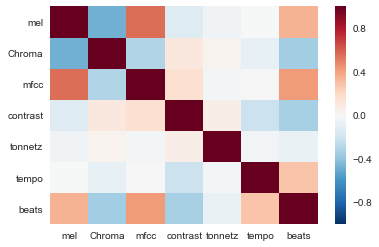

In [143]:
#training
sb.heatmap(result.corr())  

In [171]:
#Training
XX = result.ix[:,(1,2,3,4,5,6,7)].values
yy = result.ix[:,0].values
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = .3, random_state=0)


In [172]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1024, n_jobs=-1)
rf.fit(X_train, y_train)
yhat2 = rf.predict(X_test)

In [173]:
t = pd.DataFrame(data=y_test)
l = pd.DataFrame(data=yhat2)
final = pd.concat([l,t],axis = 1)

In [ ]:
print(final)

In [175]:
n_cor = 0
for i in range(len(y_test)):
    if y_test[i] == yhat2[i]:
        n_cor = n_cor+1

print(n_cor/len(y_test))
print(n_cor)

0.7912087912087912
72


In [ ]:
#TEsting
test_table = np.zeros(shape=(131,7))
folder =os.getcwd()+"/data/test_data/"
a = 0
labels = np.empty(0)
for file in os.listdir(folder):
    path = os.path.join(folder,file)
    if path.endswith('.wav'):
        y, sr = librosa.load(path)
        stft = np.abs(librosa.stft(y))
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        test_table[a,0] = np.mean(librosa.feature.melspectrogram(y, sr=sr, n_mels=128).T)
        test_table[a,1]= np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sr).T)
        test_table[a,2] = np.mean(librosa.feature.mfcc(S=stft, n_mfcc=13).T)
        test_table[a,3] = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T)
        test_table[a,4]= np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y),sr=sr).T)
        tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
        test_table[a,5], test_table[a,6] = np.mean(tempo), np.mean(beats)
        a = a+1
        print(a)
        
y_final = rf.predict(test_table)

In [ ]:
y_final = rf.predict(test_table)
submission = np.empty(0)
a = 0
for file in os.listdir("./data/test_data"):
    path = os.path.join(folder,file)
    if path.endswith('.wav'):
        submission = np.append(submission,file)
        a = a+1

aa = pd.DataFrame(data=submission)
bb= pd.DataFrame(data=y_final[0:131])
final = pd.concat([aa,bb],axis = 1)
print(final)

In [206]:
sub = final.to_csv('sub_1_bhavika.csv')